## Checking resolution

In [18]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy

import os
home = os.path.expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [19]:
plt.rcParams['figure.figsize'] = [17.5, 5]

In [20]:
import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/phd/functions'.format(home))
from myFuncs import *

### CMIP5

In [21]:
variable = 'precip'

models_cmip5 = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

resolutions = [
    'orig',
    # 'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85'
    ]



In [22]:
ds = get_dsvariable('precip', models_cmip5[0], experiments[0], resolution=resolutions[0])
ds

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 55, lon: 144)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -34.23 -32.96 -31.69 -30.42 ... 31.69 32.96 34.23
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes: (12/28)
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          historical
    source:                 IPSL-CM5A-MR (2010) : atmos : LMDZ4 (LMDZ4_v5, 14...
    model_id:               IPSL-CM5A-MR
    forcing:                Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA
    ...                     ...
    table_id:               Table day (10 February 2011) 80e409bd73611e9d25d0...
    title:                  IPSL-CM5A-MR model output prepared for CMIP5 hist...
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.7.1

In [23]:
dlats, dlons, res, model_list = [], [], [], []

for model in models_cmip5:
        data = get_dsvariable('precip', model, experiments[0], resolution=resolutions[0])['precip']
        dlat = data['lat'][2] - data['lat'][1]
        dlon = data['lon'][2] - data['lon'][1]
        
        dlats = np.append(dlats, dlat)
        dlons = np.append(dlons, dlon)
        res = np.append(res, dlat * dlon)
        model_list = np.append(model_list, model)

Text(0, 0.5, 'resolution (dlat x dlon)')

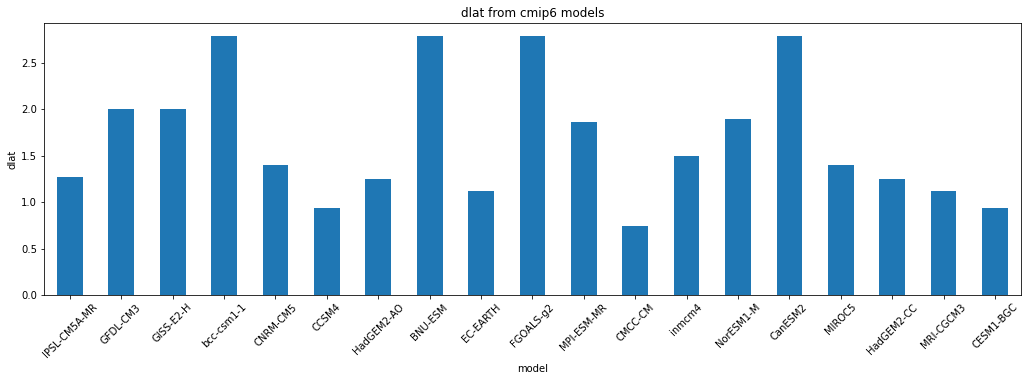

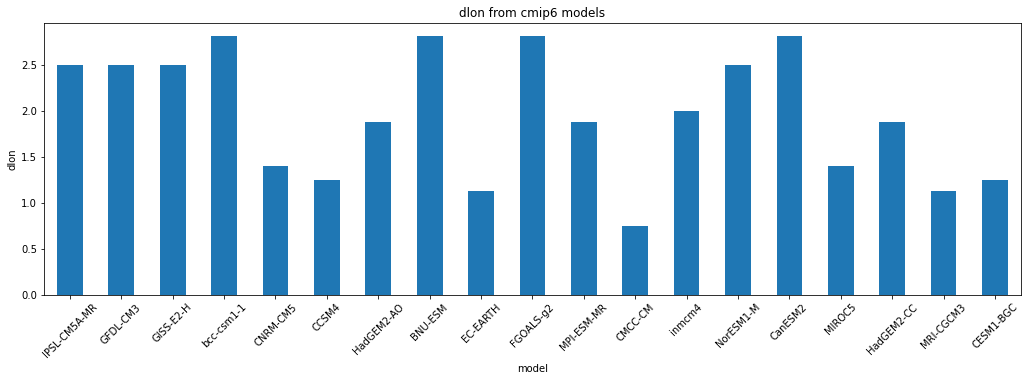

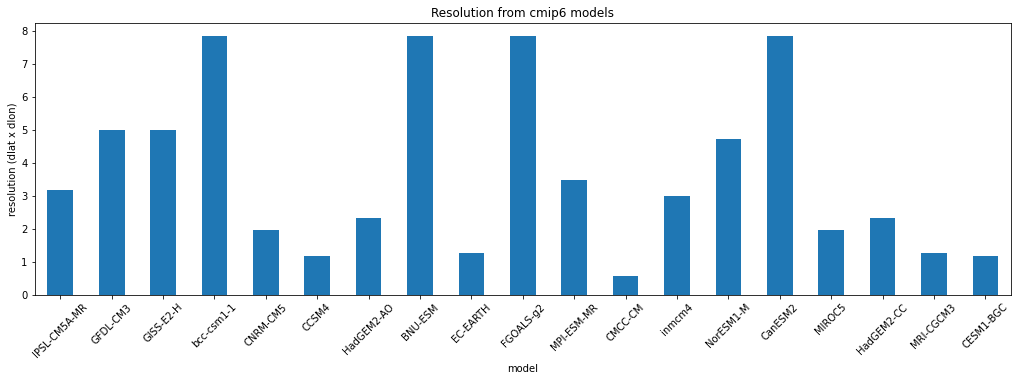

In [24]:
dlats = xr.DataArray(
    data = dlats,
    dims = ['model'],
    coords={'model': model_list},
    )

plt.figure()
dlats.to_series().plot.bar(rot=45)
plt.title('dlat from cmip6 models')
plt.ylabel('dlat')

dlons = xr.DataArray(
    data = dlons,
    dims = ['model'],
    coords={'model': model_list},
    )

plt.figure()
dlons.to_series().plot.bar(rot=45)
plt.title('dlon from cmip6 models')
plt.ylabel('dlon')

res = xr.DataArray(
    data = res,
    dims = ['model'],
    coords={'model': model_list},
    )

plt.figure()
res.to_series().plot.bar(rot=45)
plt.title('Resolution from cmip6 models')
plt.ylabel('resolution (dlat x dlon)')

### CMIP6

In [25]:
variable = 'precip'

models_cmip6 =[
    'TaiESM1',        # 1 # rcp monthly
    'BCC-CSM2-MR',    # 2 # rcp monthly   
    'FGOALS-g3',      # 3 # rcp 0463 - 0614
    'CNRM-CM6-1',     # 4 # rcp 1850-1999
    'MIROC6',         # 5 # rcp 3200 - 3340
    'MPI-ESM1-2-HR',  # 6 # rcp 1850 - 2014
    'NorESM2-MM',     # 7 # rcp 0001 - 0141
    'GFDL-CM4',       # 8 # rcp 0001 - 0141 (gr2)
    'CanESM5',        # 9 # rcp 1850 - 2000
    'CMCC-ESM2',      # 10 # rcp monthly
    'UKESM1-0-LL',    # 11 # rcp 1850 - 1999
    'MRI-ESM2-0',     # 12 # rcp 1850 - 2000
    'CESM2',          # 13 # rcp 0001 - 0990  (multiple fill values (check if all get converted to NaN), for historical)
    'NESM3',          # 12 # rcp 1850-2014
    ]

resolutions = [
    'orig',
    # 'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85'
    ]

In [27]:
ds = get_dsvariable('precip', models_cmip6[0], experiments[0], resolution=resolutions[0])
ds

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 74, lon: 288)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -34.4 -33.46 -32.51 -31.57 ... 31.57 32.51 33.46 34.4
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0671-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     171550.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/f30753ce-cdb4-4fb8-a265-1bdb1f2f3c6b

In [28]:
dlats, dlons, res, model_list = [], [], [], []

for model in models_cmip6:
        data = get_dsvariable('precip', model, experiments[0], resolution=resolutions[0])['precip']
        dlat = data['lat'][2] - data['lat'][1]
        dlon = data['lon'][2] - data['lon'][1]
        
        dlats = np.append(dlats, dlat)
        dlons = np.append(dlons, dlon)
        res = np.append(res, dlat * dlon)
        model_list = np.append(model_list, model)

Text(0, 0.5, 'resolution (dlat x dlon)')

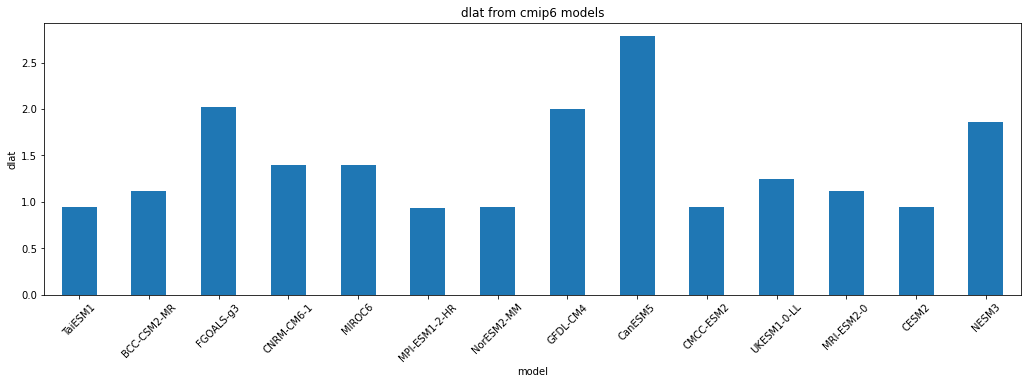

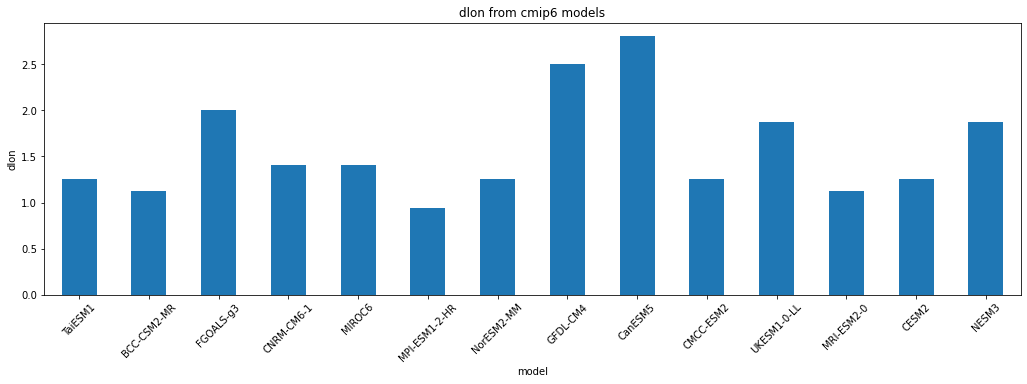

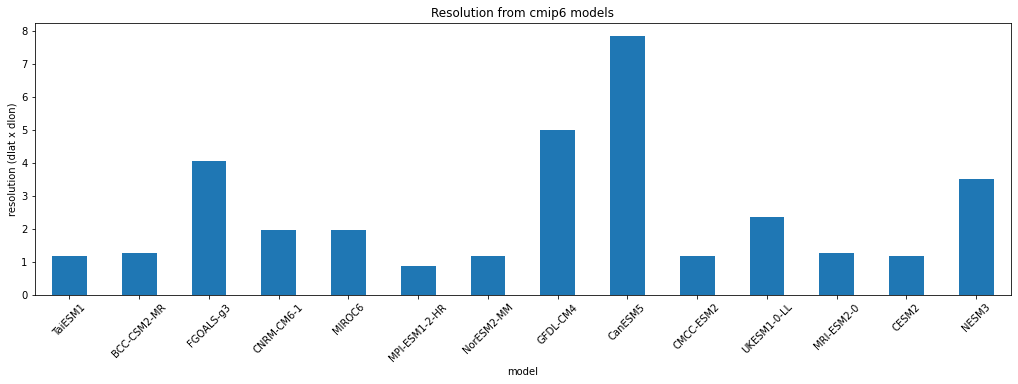

In [29]:
dlats = xr.DataArray(
    data = dlats,
    dims = ['model'],
    coords={'model': model_list},
    )

plt.figure()
dlats.to_series().plot.bar(rot=45)
plt.title('dlat from cmip6 models')
plt.ylabel('dlat')

dlons = xr.DataArray(
    data = dlons,
    dims = ['model'],
    coords={'model': model_list},
    )

plt.figure()
dlons.to_series().plot.bar(rot=45)
plt.title('dlon from cmip6 models')
plt.ylabel('dlon')

res = xr.DataArray(
    data = res,
    dims = ['model'],
    coords={'model': model_list},
    )

plt.figure()
res.to_series().plot.bar(rot=45)
plt.title('Resolution from cmip6 models')
plt.ylabel('resolution (dlat x dlon)')